# 4. Segmentation of Pre- and Post-Treatment Brain Metastases

# Overview
Issue:

1. Monitoring metastatic brain disease is laborious and time-consuming, especially when managing multiple metastases and relying on manual techniques.
2. Brain metastases are commonly assessed by measuring their largest unidimensional diameter according to RANO-BM guidelines. However, accurate volumetric estimates of the lesions and surrounding edema are essential for effective clinical decision-making and to improve treatment outcome predictions.
3. Brain metastases are frequently small, complicating the detection and segmentation of lesions smaller than 10 mm. Such tasks have previously resulted in low dice similarity coefficients.

Proposed solution:

* To use a machine learning approach to automatically segment brain metastases and perilesional edema, enhancing time efficiency, reproducibility, and robustness against inter-rater variability.

Impact:

* This challenge aims to provide essential algorithms that can be utilized in both current and post-treatment settings, potentially revolutionizing the management and monitoring of patients.


# Task
Develop a versatile autosegmentation algorithm that precisely delineates brain metastases of varying sizes and is applicable for both pre- and post-treatment cases.

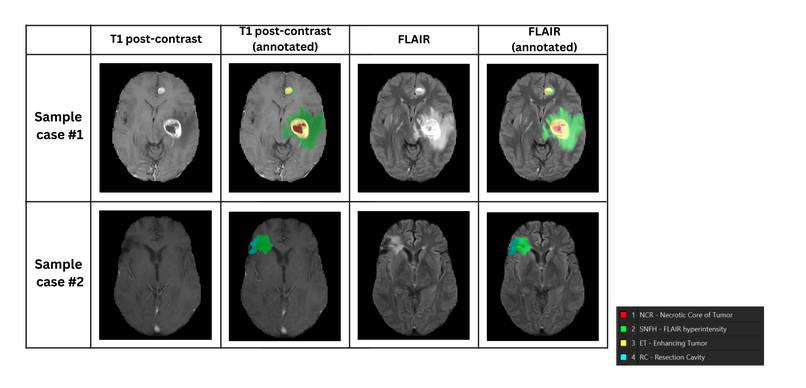

In [1]:
from IPython.display import Image, display

display(Image(filename='Task.png'))

# Data

The BraTS 2025 Brain Metastases dataset consists of a retrospective compilation of pre- and posttreatment brain metastases mpMRI scans obtained from various institutions under standard clinical conditions. This array of data, collected from different equipment and imaging protocols, offers a broad spectrum of image quality, thereby reflecting the diverse clinical practices across institutions.

The dataset comprises multiparametric MRI (mpMRI) scans, which include the following series:

*    pre-contrast T1-weighted (T1W)
*    post-contrast T1-weighted (T1C)
*    T2-weighted (T2W)
*    T2-weighted Fluid Attenuated Inversion Recovery (FLAIR)*

In 2025, T2W became non-mandatory in BraTS-METS. Some cases have native T2, some have synthetic T2, some don't have T2. All imaging volumes were segmented using the STAPLE fusion of different brain metastases segmentation algorithms. These fused labels were then manually refined by neuroradiology experts of varying rank and experience, adhering to a consistently communicated annotation protocol. Experienced board-certified attending neuroradiologists approved the manually refined annotations.


Note (2025 March 3)

The currently available training and validation data is preliminary and is undergoing further quality review by the MICCAI Lighthouse Chair Committee. While participants may begin training their models now, you are encouraged to report any data issues encountered in this discussion thread. The final QC-approved datasets are expected to be released by 5 May 2025 and should be used for training your final model(s). An announcement will be made on Synapse once the final versions are released.


# Label Description

For BraTS 2025 Brain Metastases, the following 4-label system is used:

* Nonenhancing tumor core (NETC; Label 1): All portions of tumor core without contrast enhancement that are enclosed by enhancing tumor (ET). It represents the bulk of the tumor, which is what is typically considered for surgical excision.

* Surrounding non-enhancing FLAIR hyperintensity (SNFH; Label 2): Peritumoral edematous and infiltrated tissue, defined by the abnormal hyperintense signal envelope on the T2 FLAIR volumes, which includes the infiltrative non enhancing tumor, as well as vasogenic edema in the peritumoral region. Non tumor related FLAIR signal abnormality such as prior infarcts or microvascular ischemic white matter changes are NOT included.

* Enhancing Tumor (ET; Label 3): All tumor portions with noticeable contrast enhancement on postcontrast T1-weighted images. Adjacent blood vessels, bleeding or intrinsic T1 hyperintensity are NOT included in this label.

* Resection Cavity (RC; Label 4): Delineates the resection of region within the brain in post-treatment cases.


# Datasets included in the challenge
The University of California San Diego Brain Metastases Longitudinal MRI Dataset

There are currently 646 training cases in this dataset. The dataset comprises progressive, longitudinal data. There could be cases that have been subject to non-surgical treatment, i.e. there could be cases with empty masks. Disclaimer: all the cases in this dataset have undergone a formal evaluation by a board-certified neuroradiologists, but they have not undergone additional review by the BraTS-METS board.

Image registration:

The BraTS 2025 Metastases dataset consists of a mix of cases registered in both native space and SRI24 space. All cases provided by UCSF and UCSD are in native space, totaling 968 cases. In contrast, the remaining cases are registered in SRI24 space, amounting to 328.

Registering neuroimaging cases in a common space, such as SRI24, allows for a consistent anatomical reference that facilitates comparisons across different subjects, studies, and datasets. However, it is more natural for radiologists to review cases in their native space, as interpolation can distort images and obscure small lesions.

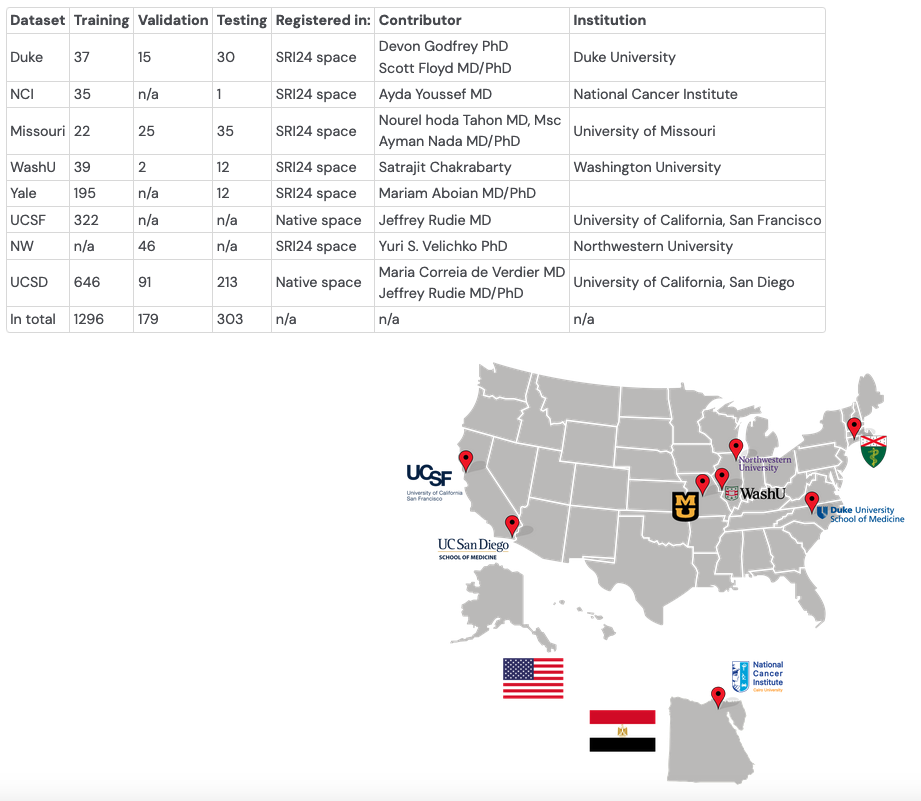

In [2]:
from IPython.display import Image, display

display(Image(filename='Datasets_included.png'))

# Challenge rules

Data is divided in training, validation, and testing datasets

Participants are provided with:

1. training dataset with associated ground truth labels
2. validation dataset without associated ground truth labels
3. testing dataset is kept hidden from participants at all times

Participants are prohibited from using data beyond the BraTS data provided data and listed external datasets for algorithm training

Usage of models pretrained on similar datasets is not allowed

Participants are allowed to use additional public or private data solely for the purpose of scientific publications, provided that this usage is explicitly mentioned in their manuscripts

Participants interested in scientific analysis of 2023 challenge should report results using this year's data to enable discussion of potential results differences


# Evaluation metrics and ranking details

The following metrics will be used for assessing the algorithm:
Dice Similarity Coefficient (DSC), Lesionwise
Normalized Surface Distance (NSD), Lesionwise
Sensitivity, Lesionwise
Specificity, Lesionwise
Precision, Lesionwise
The regions evaluated using these metrics describe the whole tumor, the tumor core, and the enhancing tumor (when present). Note that the tumor core includes the part of the tumor that is typically resected (i.e., enhancing, non-enhancing, and necrotic tumor), and the whole tumor describes all tumor sub-regions (i.e., tumor core and edema/invasion).

Ranking details:
We will follow the DELPHI-based recommendations for image analysis validation [1,2], incorporating i) algorithmic ranking, and ii) statistical significance testing. For ranking of multidimensional outcomes (or metrics), for each team, we will compute the summation of their ranks across the average of the metrics described above as a univariate overall summary measure. This measure will decide the overall ranking for each specific team. All teams will then be placed in a ranked order and their average rankings will be randomly permuted (i.e., 500,000 permutations), in a pair-wise manner. Corresponding pairwise p-values will be computed to determine the pair-wise statistical significance and report actual differences between the ordered ranked approaches. These p-values will be reported in an upper triangular matrix revealing the statistical insignificance of potential teams that will be grouped together in tiers and the significant superiority among others that we will clearly indicate. This is an evolved version of the systematic ranking that has been used on previous years for BraTS and other challenges, and will be packaged & distributed as an independent tool allowing reproducibility and use in other challenges.

For the cases in which the algorithm fails to produce a result metric for a specific test case, there will be no penalties, i.e. the metric won't be set to its worst possible value (e.g., 0 for the DSC and the NSD).

[1] Reinke et al. Understanding metric-related pitfalls in image analysis validation. Nat Methods. 2024 Feb;21(2):182-194.
[2] Maier-Hein et al. Metrics reloaded: recommendations for image analysis validation. Nat Methods. 2024 Feb;21(2):195-212.

# Information

Als Hirnmetastase wird eine Absiedlung von Krebszellen (Metastasierung) in das Hirngewebe bezeichnet, die von bösartigen Tumoren außerhalb des Gehirns ausgeht. Synonym sind die Begriffe Hirnfilia (von lateinisch filia „Tochter“) oder zerebrale Metastase (lateinisch cerebralis „zum Gehirn gehörig“).

Häufige Ausgangstumoren sind Lungenkrebs, Brustkrebs, Nierenzellkarzinom und bösartiges Melanom.[1] Hirnmetastasen sind die häufigsten Tumoren der im Bereich des Gehirns[2] auftretenden bösartigen Tumoren und können sich unter anderem durch Kopfschmerzen, neurologische Ausfallerscheinungen, Krampfanfälle und Wesensänderungen bemerkbar machen. Behandlung und Heilungsaussichten sind von vielen Faktoren abhängig, Hirnmetastasen sind jedoch meist ein prognostisch ungünstiger Umstand. 

# Data

We are provided with 3 folders: 
* MICCAI-LH-BraTS2025-MET-Challenge-corrected-labels  
* MICCAI-LH-BraTS2025-MET-Challenge-Training  
* Validation  
MICCAI-LH-BraTS2025-MET-Challenge-corrected-labels had two files: BraTS-MET-01094-003-seg.nii.gz and BraTS-MET-01184-002-seg.nii.gz which are corrected label files for two patiend in the Trainings sub folder USCD Training. 
I replaced both label files with the corrected ones. 

In [3]:
import os

base_dir = "./"

train_dir = os.path.join(base_dir, "MICCAI-LH-BraTS2025-MET-Challenge-Training")
ucsd_train_dir = os.path.join(train_dir, "UCSD - Training")
val_dir = os.path.join(base_dir, "Validation")

# Liste aller Patientencases im Hauptordner (nicht UCSD)
main_cases = sorted([
    name for name in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, name))
    and name.startswith("BraTS-MET")
])

print(f"Hauptordner-Fälle: {len(main_cases)}")
print("Beispiele:", main_cases[:3])

# Liste aller Patientencases im UCSD-Unterordner
ucsd_cases = sorted([
    name for name in os.listdir(ucsd_train_dir)
    if os.path.isdir(os.path.join(ucsd_train_dir, name))
])

print(f"UCSD-Fälle: {len(ucsd_cases)}")
print("Beispiele:", ucsd_cases[:3])


Hauptordner-Fälle: 650
Beispiele: ['BraTS-MET-00001-000', 'BraTS-MET-00002-000', 'BraTS-MET-00003-000']
UCSD-Fälle: 646
Beispiele: ['BraTS-MET-01057-000', 'BraTS-MET-01057-001', 'BraTS-MET-01057-002']


The folder MICCAI-LH-BraTS2025-MET-Challenge-Training hold 650 Cases and one folder called "UCSD - Training" holding 646 cases. 

In [4]:
import os

# Basisverzeichnisse
main_base = "MICCAI-LH-BraTS2025-MET-Challenge-Training"
ucsd_base = os.path.join(main_base, "UCSD - Training")
suffixes = ["t1n", "t1c", "t2w", "t2f", "seg"]

# Hilfsfunktion: prüft ob alle Dateien im Ordner existieren
def folder_complete(folder_path, case_name):
    return all(
        os.path.exists(os.path.join(folder_path, f"{case_name}-{s}.nii.gz"))
        for s in suffixes
    )

# Alle Ordner durchgehen
all_complete = True

# Hauptordner prüfen
for case in os.listdir(main_base):
    case_path = os.path.join(main_base, case)
    if not os.path.isdir(case_path) or case == "UCSD - Training":
        continue
    if not folder_complete(case_path, case):
        all_complete = False
        break

# UCSD-Ordner prüfen
if all_complete and os.path.isdir(ucsd_base):
    for case in os.listdir(ucsd_base):
        case_path = os.path.join(ucsd_base, case)
        if not os.path.isdir(case_path):
            continue
        if not folder_complete(case_path, case):
            all_complete = False
            break

# Ergebnis ausgeben
if all_complete:
    print("Alle Ordner enthalten alle benötigten Dateien.")


Alle Ordner enthalten alle benötigten Dateien.


Every Case folder hols 5 files with the following properties: 

In [5]:
import nibabel as nib
# Auswahl des ersten Falls
first_case = main_cases[0]
case_path = os.path.join(train_dir, first_case)

print(f"Analyzing case: {first_case}\nPath: {case_path}")

# Modalitätssuffixe + Namen
suffixes = {
    "t1n": "T1W (native)",
    "t1c": "T1-weighted contrast-enhanced",
    "t2w": "T2-weighted",
    "t2f": "FLAIR",
    "seg": "Segmentation (Label)"
}

# Volumes laden
volumes = {}
for s in suffixes:
    file_path = os.path.join(case_path, f"{first_case}-{s}.nii.gz")
    volumes[s] = nib.load(file_path).get_fdata()
    print(f"{suffixes[s]}: shape = {volumes[s].shape}, dtype = {volumes[s].dtype}")

Analyzing case: BraTS-MET-00001-000
Path: ./MICCAI-LH-BraTS2025-MET-Challenge-Training/BraTS-MET-00001-000
T1W (native): shape = (240, 240, 155), dtype = float64
T1-weighted contrast-enhanced: shape = (240, 240, 155), dtype = float64
T2-weighted: shape = (240, 240, 155), dtype = float64
FLAIR: shape = (240, 240, 155), dtype = float64
Segmentation (Label): shape = (240, 240, 155), dtype = float64


## Case Folder Structure (Example: `BraTS-MET-00747-000/`)

Each patient folder contains **5 volumes** in **NIfTI format (`.nii.gz`)**, all with **identical spatial dimensions** (e.g., `240 × 240 × 155`). These represent a fully aligned 3D imaging set of one patient, including different MRI modalities and the corresponding ground truth segmentation.

### File Contents and Clinical Meaning

| File Suffix        | Type        | Description |
|--------------------|-------------|-------------|
| `-t1n.nii.gz`      | 3D Float    | **T1-weighted native (non-contrast)** — anatomical reference; gray/white matter visible, tumor often difficult to detect. |
| `-t1c.nii.gz`      | 3D Float    | **T1-weighted contrast-enhanced (Gadolinium)** — highlights **enhancing tumor regions** with high vascularization (corresponds to Label `3`). |
| `-t2w.nii.gz`      | 3D Float    | **T2-weighted** — shows fluid-rich areas; tumors may appear hyperintense if cystic or necrotic. |
| `-t2f.nii.gz`      | 3D Float    | **FLAIR (Fluid Attenuated Inversion Recovery)** — suppresses cerebrospinal fluid signal, highlights **edema and infiltration** (corresponds to Label `2`). |
| `-seg.nii.gz`      | 3D Integer (float64) | **Segmentation mask (ground truth)** — voxel-wise labeling of tumor subregions with class values 0–4. |

### Modality Roles Summary

- **T1n** → Structural anatomy; low contrast between tumor and healthy tissue.
- **T1c** → Clearly reveals **Enhancing Tumor** (Label `3`) as bright, well-defined areas.
- **T2w** → Fluid-sensitive; useful for identifying cystic or necrotic regions.
- **FLAIR** → Best for detecting **peritumoral edema and infiltration** (Label `2`).
- **Segmentation** → Ground truth mask with voxel-level tumor annotations, created using STAPLE fusion and expert refinement.


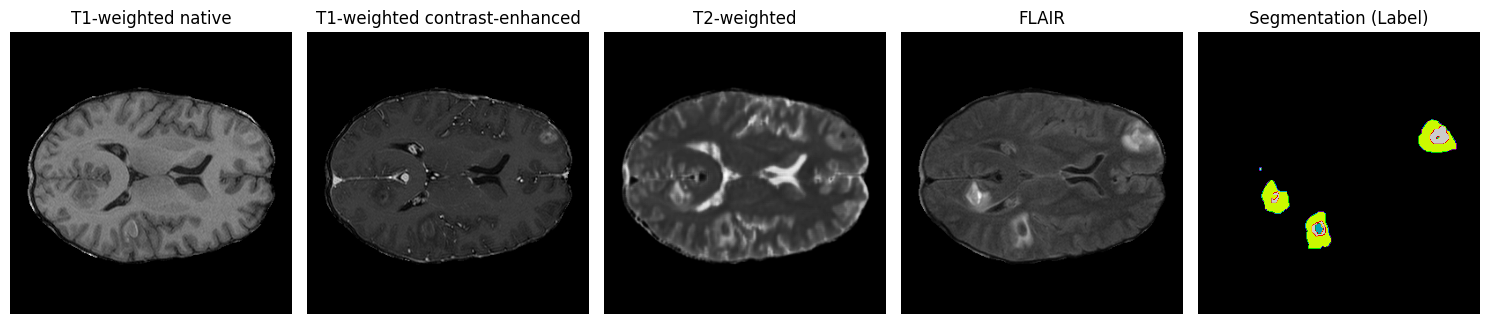

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Pfad zum Fall
case_id = "BraTS-MET-00747-000"
case_path = os.path.join(
    "MICCAI-LH-BraTS2025-MET-Challenge-Training",
    case_id
)

# Suffixe und Beschriftung
suffixes = {
    "t1n": "T1-weighted native",
    "t1c": "T1-weighted contrast-enhanced",
    "t2w": "T2-weighted",
    "t2f": "FLAIR",
    "seg": "Segmentation (Label)"
}

# Volumes laden
volumes = {}
for s in suffixes:
    path = os.path.join(case_path, f"{case_id}-{s}.nii.gz")
    volumes[s] = nib.load(path).get_fdata()

# Slice auswählen (mittlerer Z-Wert)
z = volumes["t1n"].shape[2] // 2

# Plot
plt.figure(figsize=(15, 6))
for i, (key, title) in enumerate(suffixes.items()):
    plt.subplot(1, 5, i+1)
    img = volumes[key][:, :, z]
    cmap = "nipy_spectral" if key == "seg" else "gray"
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
# volumes = 3D-MRT-Bilddaten
"""
volumes = {
    "t1n": ...  # T1-weighted native volume (3D numpy array)
    "t1c": ...  # T1-weighted with contrast
    "t2w": ...  # T2-weighted
    "t2f": ...  # FLAIR
    "seg": ...  # Segmentation labels (int values from 0–4)
}
"""
# Shapes aller Modalitäten und des Segments
for key in volumes:
    print(f"{key}: shape = {volumes[key].shape}")


t1n: shape = (320, 320, 104)
t1c: shape = (320, 320, 104)
t2w: shape = (320, 320, 104)
t2f: shape = (320, 320, 104)
seg: shape = (320, 320, 104)


# Data.preporcessing Shapes of the Cases

In [8]:
import os
import nibabel as nib
from collections import Counter

# Verzeichnisse
main_dir = "MICCAI-LH-BraTS2025-MET-Challenge-Training"
ucsd_dir = os.path.join(main_dir, "UCSD - Training")

def collect_shapes(folder):
    shape_counts = Counter()
    for case in os.listdir(folder):
        case_path = os.path.join(folder, case)
        if not os.path.isdir(case_path):
            continue
        t1n_path = os.path.join(case_path, f"{case}-t1n.nii.gz")
        if not os.path.exists(t1n_path):
            continue
        try:
            shape = nib.load(t1n_path).shape
            shape_counts[shape] += 1
        except Exception as e:
            shape_counts[str(e)] += 1
    return shape_counts

# Shape-Verteilung in beiden Ordnern
main_shapes = collect_shapes(main_dir)
ucsd_shapes = collect_shapes(ucsd_dir)

# Ausgabe
print("Hauptordner Shapes:")
for shape, count in main_shapes.items():
    print(f"  {shape}: {count} Fälle")

print("UCSD-Ordner Shapes:")
for shape, count in ucsd_shapes.items():
    print(f"  {shape}: {count} Fälle")


Hauptordner Shapes:
  (256, 256, 106): 29 Fälle
  (240, 240, 155): 328 Fälle
  (256, 256, 192): 1 Fälle
  (256, 256, 98): 16 Fälle
  (256, 256, 126): 46 Fälle
  (320, 320, 104): 36 Fälle
  (288, 90, 288): 1 Fälle
  (256, 256, 116): 6 Fälle
  (256, 256, 100): 12 Fälle
  (336, 336, 104): 4 Fälle
  (512, 512, 33): 2 Fälle
  (256, 256, 108): 19 Fälle
  (320, 320, 110): 6 Fälle
  (256, 256, 110): 11 Fälle
  (400, 140, 400): 2 Fälle
  (256, 256, 112): 8 Fälle
  (256, 256, 104): 20 Fälle
  (256, 256, 136): 4 Fälle
  (256, 256, 102): 8 Fälle
  (256, 256, 128): 13 Fälle
  (256, 256, 204): 1 Fälle
  (256, 256, 96): 4 Fälle
  (512, 512, 62): 1 Fälle
  (512, 512, 231): 1 Fälle
  (400, 400, 90): 33 Fälle
  (320, 320, 108): 1 Fälle
  (512, 512, 110): 1 Fälle
  (512, 512, 50): 2 Fälle
  (336, 336, 110): 3 Fälle
  (256, 256, 140): 1 Fälle
  (512, 246, 512): 1 Fälle
  (400, 90, 400): 1 Fälle
  (256, 256, 144): 2 Fälle
  (288, 288, 90): 1 Fälle
  (512, 512, 56): 1 Fälle
  (512, 512, 206): 1 Fälle
  (512

we see that we got a lot of different shapes, checking t1n. so we still wanna check if the shapes are all the same for cases. 

In [9]:
import os
import nibabel as nib

# Ordner definieren
main_dir = "MICCAI-LH-BraTS2025-MET-Challenge-Training"
ucsd_dir = os.path.join(main_dir, "UCSD - Training")

# Modalitäten, die geprüft werden sollen
modalities = ["t1n", "t1c", "t2w", "t2f", "seg"]

def check_shapes(folder_path):
    consistent = 0
    inconsistent = 0
    bad_cases = []

    for case in os.listdir(folder_path):
        case_path = os.path.join(folder_path, case)
        if not os.path.isdir(case_path):
            continue

        shapes = []
        missing = False

        for mod in modalities:
            f = os.path.join(case_path, f"{case}-{mod}.nii.gz")
            if not os.path.exists(f):
                missing = True
                break
            try:
                shape = nib.load(f).shape
                shapes.append(shape)
            except Exception:
                missing = True
                break

        if missing:
            continue  # überspringe unvollständige Fälle

        if len(set(shapes)) == 1:
            consistent += 1
        else:
            inconsistent += 1
            bad_cases.append((case, shapes))

    return consistent, inconsistent, bad_cases

# Hauptordner prüfen
main_ok, main_fail, main_bad = check_shapes(main_dir)
# UCSD prüfen
ucsd_ok, ucsd_fail, ucsd_bad = check_shapes(ucsd_dir)

# Ergebnisse anzeigen
print(f"Hauptordner: {main_ok} konsistent, {main_fail} inkonsistent")
print(f"UCSD-Ordner: {ucsd_ok} konsistent, {ucsd_fail} inkonsistent")


Hauptordner: 650 konsistent, 0 inkonsistent
UCSD-Ordner: 646 konsistent, 0 inkonsistent


then we wanna check if alle cases have T2 because they state: Some cases have native T2, some have synthetic T2, some don't have T2. 

In [17]:
import os
from pathlib import Path

# Basisverzeichnis
base_dir = Path("MICCAI-LH-BraTS2025-MET-Challenge-Training")

# Alle Case-Ordner in Training + UCSD-Unterordner finden
all_case_dirs = [p for p in base_dir.glob("*") if p.is_dir()]
ucsd_dir = base_dir / "UCSD"
if ucsd_dir.exists():
    all_case_dirs += [p for p in ucsd_dir.glob("*") if p.is_dir()]

# Erwartete Suffixe pro Case
required_suffixes = ["-t1n.nii.gz", "-t1c.nii.gz", "-t2f.nii.gz", "-seg.nii.gz"]
optional_suffix = "-t2w.nii.gz"  # darf fehlen

# Durchlauf durch alle Fälle
for case_dir in all_case_dirs:
    case_id = case_dir.name
    missing = []
    for suffix in required_suffixes:
        expected_file = case_dir / f"{case_id}{suffix}"
        if not expected_file.exists():
            missing.append(suffix)
    # T2W ist optional, aber wir prüfen, ob es fehlt
    t2w_file = case_dir / f"{case_id}{optional_suffix}"
    has_t2w = t2w_file.exists()

    if missing:
        print(f"[Fehlend] {case_id}: Fehlende Dateien: {missing}")
    elif not has_t2w:
        print(f"[Hinweis] {case_id}: T2W fehlt (optional)")


[Fehlend] UCSD - Training: Fehlende Dateien: ['-t1n.nii.gz', '-t1c.nii.gz', '-t2f.nii.gz', '-seg.nii.gz']


In [18]:
import os
from pathlib import Path

# Basisverzeichnis
base_dir = Path("MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training")

# Alle Case-Ordner in Training + UCSD-Unterordner finden
all_case_dirs = [p for p in base_dir.glob("*") if p.is_dir()]
ucsd_dir = base_dir / "UCSD"
if ucsd_dir.exists():
    all_case_dirs += [p for p in ucsd_dir.glob("*") if p.is_dir()]

# Erwartete Suffixe pro Case
required_suffixes = ["-t1n.nii.gz", "-t1c.nii.gz", "-t2f.nii.gz", "-seg.nii.gz"]
optional_suffix = "-t2w.nii.gz"  # darf fehlen

# Durchlauf durch alle Fälle
for case_dir in all_case_dirs:
    case_id = case_dir.name
    missing = []
    for suffix in required_suffixes:
        expected_file = case_dir / f"{case_id}{suffix}"
        if not expected_file.exists():
            missing.append(suffix)
    # T2W ist optional, aber wir prüfen, ob es fehlt
    t2w_file = case_dir / f"{case_id}{optional_suffix}"
    has_t2w = t2w_file.exists()

    if missing:
        print(f"[Fehlend] {case_id}: Fehlende Dateien: {missing}")
    elif not has_t2w:
        print(f"[Hinweis] {case_id}: T2W fehlt (optional)")

now we again check which 

# data.preporcessing


## Preprocessing Steps – Best Practices from BraTS-METS 2023

Several top teams from the BraTS-METS 2023 challenge implemented robust preprocessing pipelines to ensure model stability and generalization across diverse data. Below is an overview of commonly used preprocessing steps, who applied them, and their purpose.

---

### Input Construction & Modality Handling
- **All Top Teams** (NVAUTO, SY, blackbean, CNMCPMI2023):
  - Used **4-channel inputs**: T1n, T1c, T2w, FLAIR
  - **Missing modalities** (e.g., absent or synthetic T2W) handled via:
    - Model robustness (e.g., multi-branch architecture – SY)
    - Masking or default zeros (e.g., STU-Net, nnUNet-inspired)

**Why:** Some cases lack native T2W. Models must be robust to heterogeneous modality presence.

---

### Spatial Normalization & Resampling
- **NVAUTO**:
  - Cropped to fixed size `224×224×144`
- **blackbean**:
  - Used larger patch size `160×160×160`
- **CNMCPMI2023**:
  - Followed nnU-Net spatial standardization

**Why:** Input size standardization improves model convergence and allows patch-based training.

---

### Intensity Normalization
- **NVAUTO, SY**:
  - **Z-score normalization**: zero mean, unit variance
  - Applied **per modality** with background excluded

**Why:** Reduces scanner/protocol variability and stabilizes training.

---

### Cropping / Centering
- **All Teams**:
  - Random or center cropping to reduce background and focus on tumor
  - Padding used where needed

**Why:** Removes irrelevant background; optimizes memory use for training.

---

### Data Augmentation
- **All Top Teams**:
  - Applied **heavy augmentation** to combat class imbalance and small lesion variability
  - Types:
    - **Spatial**: random flip, rotation, elastic deformation, scaling
    - **Intensity**: noise, blur, contrast jitter

**Why:** Critical to improve generalization and detect small, sparse metastases.

---

### Label Preparation
- **All Teams** used the official BraTS-METS label set:
  - 0: Background
  - 1: Nonenhancing Tumor Core (NETC)
  - 2: FLAIR Hyperintensity (SNFH)
  - 3: Enhancing Tumor (ET)
  - 4: Resection Cavity (RC)
- Derived composite masks:
  - **Whole Tumor** = 1+2+3+4
  - **Tumor Core** = 1+3+4

**Why:** Some metrics (e.g., Dice) are computed on regions like "Whole Tumor", "Tumor Core", and "ET".

---

📄 **Source:** [BraTS-METS 2023 Challenge Paper](https://arxiv.org/pdf/2306.00838.pdf), especially Table 5 and Section 5.3



## Planned Preprocessing Pipeline (Based on 2023 Best Practices)

### 1. **Modality Selection**
- Use 4 MRI modalities: `T1n`, `T1c`, `T2w`, `FLAIR`
- Handle missing `T2w` gracefully (e.g., zero-fill or mask)

### 2. **Spatial Normalization**
- Resample all scans to consistent voxel spacing (e.g., `1×1×1 mm`)
- Crop or pad to fixed size (e.g., `160×160×160` or `224×224×144`)

### 3. **Intensity Normalization**
- Z-score normalization: per modality (exclude background)

### 4. **Label Preparation**
- Ensure consistent label mapping: 0=Background, 1=NETC, 2=SNFH, 3=ET, 4=RC
- Generate region masks (Whole Tumor, Tumor Core, ET) if needed

### 5. **Data Augmentation (for training)**
- Spatial: random flip, rotate, scale, elastic deformation
- Intensity: noise, blur, contrast shift

### 6. **Export to NPZ Format**
- Save preprocessed scans + segmentation masks in `.npz` format
- Structure: one `.npz` file per case with shape `(C, H, W, D)`, C=channels



In [20]:
import os
import numpy as np
import nibabel as nib
import scipy.ndimage
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Define constants
input_base = "/Users/dominikzauner/Desktop/JKU/MedicalImagingUE/Challenge/MICCAI-LH-BraTS2025-MET-Challenge-Training"
output_base = "/Users/dominikzauner/Desktop/JKU/MedicalImagingUE/Challenge/NPZ_Preprocessed"
ucsd_folder = "UCSD - Training"
modalities = ["t1n", "t1c", "t2w", "t2f"]
seg_suffix = "seg"
target_shape = (160, 160, 160)
target_spacing = (1.0, 1.0, 1.0)

# Helper function to resample image
def resample_to_spacing(image, new_spacing=(1, 1, 1)):
    original_spacing = image.header.get_zooms()
    resize_factors = [o / n for o, n in zip(original_spacing, new_spacing)]
    resampled = scipy.ndimage.zoom(image.get_fdata(), resize_factors, order=1)
    return resampled

# Normalize excluding background
def zscore_normalize(image):
    mask = image > 0
    if np.any(mask):
        scaler = StandardScaler()
        image[mask] = scaler.fit_transform(image[mask].reshape(-1, 1)).flatten()
    return image

# Crop or pad to target shape
def crop_or_pad(image, target_shape):
    result = np.zeros(target_shape, dtype=image.dtype)
    min_shape = np.minimum(image.shape, target_shape)
    slices_source = tuple(slice(0, s) for s in min_shape)
    slices_target = tuple(slice(0, s) for s in min_shape)
    result[slices_target] = image[slices_source]
    return result

# Main preprocessing function
def preprocess_case(case_path, output_folder):
    case_id = os.path.basename(case_path)
    images = []
    
    for mod in modalities:
        path = os.path.join(case_path, f"{case_id}-{mod}.nii.gz")
        if not os.path.exists(path):
            image = np.zeros(target_shape)
        else:
            img = nib.load(path)
            data = resample_to_spacing(img, target_spacing)
            data = zscore_normalize(data)
            data = crop_or_pad(data, target_shape)
            images.append(data)

    # Load and process segmentation
    seg_path = os.path.join(case_path, f"{case_id}-seg.nii.gz")
    seg = nib.load(seg_path)
    seg_resampled = scipy.ndimage.zoom(seg.get_fdata(), 
                                       [o / n for o, n in zip(seg.header.get_zooms(), target_spacing)], 
                                       order=0)
    seg_cropped = crop_or_pad(seg_resampled, target_shape)

    npz_path = os.path.join(output_folder, f"{case_id}.npz")
    np.savez_compressed(npz_path, image=np.stack(images, axis=0), label=seg_cropped.astype(np.uint8))

# Collect all case paths
def collect_case_paths(base_dir):
    case_paths = []
    for folder in os.listdir(base_dir):
        full_path = os.path.join(base_dir, folder)
        if os.path.isdir(full_path) and not folder.startswith("UCSD"):
            case_paths.append(full_path)
    ucsd_path = os.path.join(base_dir, ucsd_folder)
    for folder in os.listdir(ucsd_path):
        full_path = os.path.join(ucsd_path, folder)
        if os.path.isdir(full_path):
            case_paths.append(full_path)
    return case_paths

# Create output directory
os.makedirs(output_base, exist_ok=True)

# Run preprocessing
case_paths = collect_case_paths(input_base)
for case in tqdm(case_paths, desc="Preprocessing cases"):
    preprocess_case(case, output_base)



Preprocessing cases:  90%|████████▉ | 1162/1296 [1:37:48<18:23,  8.24s/it] 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/NPZ_Preprocessed/BraTS-MET-00026-000.npz")
modalities = data['image']  # shape: (4, 160, 160, 160)
label = data['label']       # shape: (160, 160, 160)

plt.imshow(modalities[0, :, :, 80], cmap='gray')  # e.g., axial slice of T1n
plt.imshow(label[:, :, 80], alpha=0.3)            # overlay label
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

data_dir = "/path/to/preprocessed_npz"

files = [f for f in os.listdir(data_dir) if f.endswith(".npz")]
sample_file = os.path.join(data_dir, random.choice(files))

# Load sample
data = np.load(sample_file)
image, label = data["image"], data["label"]

print("Image shape:", image.shape)  # Should be (4, H, W, D)
print("Label shape:", label.shape)  # Should be (H, W, D)

# Check label distribution
print("Unique labels:", np.unique(label))

# Check statistics for each modality
for i in range(4):
    mod = image[i]
    print(f"Modality {i} - mean: {mod.mean():.3f}, std: {mod.std():.3f}, min: {mod.min()}, max: {mod.max()}")

# Optional: show one slice
slice_idx = label.shape[2] // 2
plt.figure(figsize=(10, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(image[i, :, :, slice_idx], cmap='gray')
    plt.title(f'Mod {i}')
    plt.axis('off')
plt.suptitle("Mid-slice of each modality")
plt.show()

plt.figure()
plt.imshow(label[:, :, slice_idx])
plt.title("Segmentation Mask")
plt.axis('off')
plt.show()


# Custom Dataset Class

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset

class BraTSNPZDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.paths = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if f.endswith('.npz')]
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        npz = np.load(self.paths[idx])
        image = npz['image']  # (4, H, W, D)
        label = npz['label']  # (H, W, D)

        if self.transform:
            image, label = self.transform(image, label)

        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


# Basic Transform

In [ ]:
import numpy as np
import random

class RandomFlip:
    def __call__(self, image, label):
        if random.random() > 0.5:
            image = np.flip(image, axis=2).copy()
            label = np.flip(label, axis=1).copy()
        return image, label


# DataLoader

In [ ]:
from torch.utils.data import DataLoader

def get_loader(data_path, batch_size=2):
    dataset = BraTSNPZDataset(data_path, transform=RandomFlip())
    return DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)


#  3D U-Net Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.layers(x)

class UNet3D(nn.Module):
    def __init__(self, in_channels=4, out_channels=5):
        super().__init__()
        self.enc1 = DoubleConv(in_channels, 32)
        self.pool1 = nn.MaxPool3d(2)
        self.enc2 = DoubleConv(32, 64)
        self.pool2 = nn.MaxPool3d(2)
        self.bottleneck = DoubleConv(64, 128)
        self.up2 = nn.ConvTranspose3d(128, 64, 2, stride=2)
        self.dec2 = DoubleConv(128, 64)
        self.up1 = nn.ConvTranspose3d(64, 32, 2, stride=2)
        self.dec1 = DoubleConv(64, 32)
        self.out = nn.Conv3d(32, out_channels, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        b = self.bottleneck(self.pool2(e2))
        d2 = self.dec2(torch.cat([self.up2(b), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return self.out(d1)


# Training Loop

In [ ]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)
